# TELECOM CHURN CASE STUDY

### CHETAN KARNIK

### Problem Statement

- The telecommunications industry experiences an average of 15-25% annual churn rate.It costs 5-10 times more to acquire a new 
  customer than to retain an existing one, customer retention has now become very important aspect than customer acquisition.
- Analyst required to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at
  high risk of churn and identify the main indicators of churn.
- Define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers

###   Key Challenges :

- Telecom companies need to predict which customers are at high risk of churn.
- Retaining high profitable customers is Top most business goal..

###  Business Objective / End Expectation from Telecom Churn Case Study

#### Goal of the Data Analysis:

The company wants to know:
-  Predict the churn in the last (i.e. the ninth) month using the data (features) previous last three three months. 
-  **Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc.
   over a period of time.
-  Variables that are significant in predicting the Churn based on the customer behaviours.
-  How well those variables impact the Churning.

#### Broader Strategy :
- **Make a Informed decision:** - Analyse customer-level data, build predictive models to identify customers at high risk of 
   churn and identify the main indicators of churn
-  Approximately 80% of revenue comes from the top 20% customers (called high-value customers).
-  Reduce churn of the high-value customers, we will be able to reduce significant revenue leakage..
 
#### Key outcome
- Identify the pattern of "Churn" early based on the given data set.
- Required to model the customer behaviour with the available independent variables in the past few months 
- The inferences used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). 
- With this insight, the company can take action steps such as providing special plans, discounts on recharge etc.
- It will be used by the management to understand & identify important variables that are strong predictors of churn. 
- These variables may also indicate why customers choose to switch to other networks. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- The model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import os
import sys

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1.0  Reading File 

####  Note :
 * Correct encoding "iso-8859-1' followed to read the file.
 * {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
# Importing dataset
base_data = pd.read_csv("telecom_churn_data.csv")

# Keep a copy of Telecom master file
base_data_master = base_data.copy()

### Check the basics of the dataset

In [4]:
#Lets check the shape and first few rows of the dataset
base_data.shape

(99999, 226)

In [5]:
base_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
#Check if the mobile_number cloumn is the identifier
len(base_data.mobile_number.unique())

99999

In [7]:
print(base_data.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


## 2.0 Data Preparation

In [8]:
#Lets check how many columns we have with dtype = object
base_data.select_dtypes(include=object)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [9]:
# We have 12 object type columns. All of them are related to dates
# Now, lets check how many numeric columns we have
base_data.select_dtypes(include=np.number)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,18.471,69.161,57.530,29.950,5.40,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,7000607688,109,0.0,0.0,0.0,112.201,77.811,79.081,140.835,29.26,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,7000087541,109,0.0,0.0,0.0,229.187,0.000,0.000,0.000,1.11,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,7000498689,109,0.0,0.0,0.0,322.991,303.386,606.817,731.010,0.00,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [10]:
#Rest all are numeric columns. All numeric columns are about quantity and price

In [11]:
#Lets check the nulls in this dataset
base_data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [12]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [13]:
pd.set_option("max_rows", None)

In [14]:
null_cols = round(100*(base_data.select_dtypes(include=np.number).isnull().sum()/len(base_data.index)), 2)
print(null_cols)
print(null_cols.value_counts())

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8    

### There are certain patterns in the null values.
1. Minutes Of Usage columns have less than 10% null values. These can be imputed with zero assuming there was no usage in a particular category
2. Several Amount fields have above 70% null values
3. For a particular month, the numbeer of null values is constant. Example: Null Percentage for total_rech_data_7, max_rech_data_7, count_rech_2g_7, count_rech_3g_7, av_rech_amt_data_7, arpu_3g_7, arpu_2g_7, night_pck_user_7, fb_user_7 are all *74.43%*
4. We can impute zero foor all usage and amount fields to indicate that was no activity in that category

In [15]:
pd.reset_option("max_rows")

In [16]:
base_data[base_data.select_dtypes(include=np.number).columns] = base_data[base_data.select_dtypes(include=np.number).columns].fillna(0)

In [17]:
pd.set_option("max_rows", None)

In [18]:
base_data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                  0
std_og_t2o_mou                  0
loc_ic_t2o_mou                  0
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                     0
onnet_mou_7                     0
onnet_mou_8                     0
onnet_mou_9                     0
offnet_mou_6                    0
offnet_mou_7                    0
offnet_mou_8                    0
offnet_mou_9                    0
roam_ic_mou_6                   0
roam_ic_mou_7                   0
roam_ic_mou_8                   0
roam_ic_mou_9                   0
roam_og_mou_6                   0
roam_og_mou_7                   0
roam_og_mou_8                   0
roam_og_mou_9                   0
loc_og_t2t_mou

In [19]:
pd.reset_option("max_rows")

#### Now, the columns having null values are all the date columns. 
#### We can derive some new columns from them. Example : Last Day Of Month - Date Of Last Recharge can give us recency for that month. 
#### Before deriving new columns
1. We will have to fix the data type to DateTime
2. We will not impute null values in these columns. But, we shall impute the derived column with a number say 100. This can be considered that the particular recharge did not happen.
3. Ofcourse, we will fix the null values in Last Day Of Month columns


In [20]:
base_data["last_date_of_month_7"].value_counts()

7/31/2014    99398
Name: last_date_of_month_7, dtype: int64

In [21]:
base_data["last_date_of_month_7"] = base_data["last_date_of_month_7"].fillna("7/31/2014")

In [22]:
base_data["last_date_of_month_8"].value_counts()

8/31/2014    98899
Name: last_date_of_month_8, dtype: int64

In [23]:
base_data["last_date_of_month_8"] = base_data["last_date_of_month_8"].fillna("8/31/2014")

In [24]:
base_data["last_date_of_month_9"].value_counts()

9/30/2014    98340
Name: last_date_of_month_9, dtype: int64

In [25]:
base_data["last_date_of_month_9"] = base_data["last_date_of_month_9"].fillna("9/30/2014")

#### Lets convert these columns to datatime columns

In [26]:
base_data["last_date_of_month_6"] = pd.to_datetime(base_data["last_date_of_month_6"], format="%m/%d/%Y")

In [27]:
base_data["last_date_of_month_7"] = pd.to_datetime(base_data["last_date_of_month_7"], format="%m/%d/%Y")
base_data["last_date_of_month_8"] = pd.to_datetime(base_data["last_date_of_month_8"], format="%m/%d/%Y")
base_data["last_date_of_month_9"] = pd.to_datetime(base_data["last_date_of_month_9"], format="%m/%d/%Y")

In [28]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(179), int64(35), object(8)
memory usage: 172.4+ MB


In [29]:
base_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,...,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,...,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,...,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,...,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


#### We still have 8 object type columns. The date formats might not be uniform.
We shall first inspecgt the column values and bring in uniformity if required

In [30]:
base_data.date_of_last_rech_6.value_counts()

6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/2014       199
6/6/2014       173
6/4/2014       131
6/2/2014       109
Name: date_of_last_rech_6, dtype: int64

#### date_of_last_rech_6 column is clean. We shall convert the datatype rightaway

In [31]:
base_data["date_of_last_rech_6"] = pd.to_datetime(base_data["date_of_last_rech_6"], format="%m/%d/%Y")

In [32]:
base_data.date_of_last_rech_7.value_counts()

7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     3998
7/19/2014     3057
7/22/2014     2969
7/20/2014     2892
7/17/2014     2737
7/16/2014     2458
7/23/2014     2302
7/21/2014     1640
7/15/2014     1562
7/18/2014     1280
7/10/2014      859
7/9/2014       827
7/12/2014      732
7/14/2014      452
7/11/2014      408
7/13/2014      324
7/6/2014       313
7/4/2014       251
7/8/2014       201
7/7/2014       153
7/3/2014       153
7/5/2014       125
7/1/2014        74
7/2/2014        68
Name: date_of_last_rech_7, dtype: int64

In [33]:
base_data["date_of_last_rech_7"] = pd.to_datetime(base_data["date_of_last_rech_7"], format="%m/%d/%Y")
base_data["date_of_last_rech_8"] = pd.to_datetime(base_data["date_of_last_rech_8"], format="%m/%d/%Y")
base_data["date_of_last_rech_9"] = pd.to_datetime(base_data["date_of_last_rech_9"], format="%m/%d/%Y")

#### Lets inspect date_of_last_rech_data_6 and similar columns

In [34]:
base_data.date_of_last_rech_data_6.value_counts()

6/30/2014    1888
6/29/2014    1651
6/28/2014    1643
6/26/2014    1384
6/27/2014    1333
6/25/2014    1108
6/24/2014    1067
6/22/2014     903
6/23/2014     893
6/21/2014     861
6/17/2014     859
6/19/2014     813
6/20/2014     779
6/18/2014     773
6/14/2014     739
6/16/2014     731
6/12/2014     660
6/15/2014     656
6/13/2014     631
6/11/2014     629
6/10/2014     626
6/9/2014      607
6/6/2014      591
6/5/2014      584
6/7/2014      517
6/8/2014      514
6/3/2014      495
6/4/2014      464
6/2/2014      423
6/1/2014      331
Name: date_of_last_rech_data_6, dtype: int64

In [35]:
base_data["date_of_last_rech_data_6"] = pd.to_datetime(base_data["date_of_last_rech_data_6"], format="%m/%d/%Y")
base_data["date_of_last_rech_data_7"] = pd.to_datetime(base_data["date_of_last_rech_data_7"], format="%m/%d/%Y")
base_data["date_of_last_rech_data_8"] = pd.to_datetime(base_data["date_of_last_rech_data_8"], format="%m/%d/%Y")
base_data["date_of_last_rech_data_9"] = pd.to_datetime(base_data["date_of_last_rech_data_9"], format="%m/%d/%Y")

In [36]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


#### Now we have only date time and numeric columns

#### We will now derive new variables
We subtract every date value from the last day of month and get the recency for that month in a new column

In [37]:
base_data["recent_rech_6"] = base_data["last_date_of_month_6"] - base_data["date_of_last_rech_data_6"]

In [38]:
base_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recent_rech_6
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58,9 days
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,...,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00,NaT
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,...,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00,NaT
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,...,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00,NaT
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,...,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00,26 days


In [39]:
base_data["recent_rech_6"] = base_data["recent_rech_6"].dt.days

In [40]:
base_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,recent_rech_6
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58,9.0
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,...,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00,NaN
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,...,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00,NaN
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,...,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00,NaN
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,...,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00,26.0


In [41]:
base_data["recent_rech_7"] = base_data["last_date_of_month_7"] - base_data["date_of_last_rech_data_7"]
base_data["recent_rech_7"] = base_data["recent_rech_7"].dt.days
base_data["recent_rech_8"] = base_data["last_date_of_month_8"] - base_data["date_of_last_rech_data_8"]
base_data["recent_rech_8"] = base_data["recent_rech_8"].dt.days
base_data["recent_rech_9"] = base_data["last_date_of_month_9"] - base_data["date_of_last_rech_data_9"]
base_data["recent_rech_9"] = base_data["recent_rech_9"].dt.days

In [42]:
base_data["recent_rech_data_6"] = base_data["last_date_of_month_6"] - base_data["date_of_last_rech_data_6"]
base_data["recent_rech_data_6"] = base_data["recent_rech_data_6"].dt.days
base_data["recent_rech_data_7"] = base_data["last_date_of_month_7"] - base_data["date_of_last_rech_data_7"]
base_data["recent_rech_data_7"] = base_data["recent_rech_data_7"].dt.days
base_data["recent_rech_data_8"] = base_data["last_date_of_month_8"] - base_data["date_of_last_rech_data_8"]
base_data["recent_rech_data_8"] = base_data["recent_rech_data_8"].dt.days
base_data["recent_rech_data_9"] = base_data["last_date_of_month_9"] - base_data["date_of_last_rech_data_9"]
base_data["recent_rech_data_9"] = base_data["recent_rech_data_9"].dt.days

In [43]:
base_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,recent_rech_6,recent_rech_7,recent_rech_8,recent_rech_9,recent_rech_data_6,recent_rech_data_7,recent_rech_data_8,recent_rech_data_9
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,101.20,3.58,9.0,15.0,23.0,NaN,9.0,15.0,23.0,NaN
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,...,0.00,0.00,NaN,6.0,21.0,NaN,NaN,6.0,21.0,NaN
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,...,4.17,0.00,NaN,NaN,NaN,13.0,NaN,NaN,NaN,13.0
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,...,0.00,0.00,26.0,NaN,NaN,NaN,26.0,NaN,NaN,NaN


#### Recency is considered as the minimum number of days. There are several null values in these columns
#### Null values indicate that the customer did not recharge for voice or data. We can therefore impute all null values with 100. 100 is more than the number of days in a month. Hence we can have special consideration for this during modelling

In [44]:
base_data["recent_rech_6"] = base_data["recent_rech_6"].fillna(100)
base_data["recent_rech_7"] = base_data["recent_rech_7"].fillna(100)
base_data["recent_rech_8"] = base_data["recent_rech_8"].fillna(100)
base_data["recent_rech_9"] = base_data["recent_rech_9"].fillna(100)
base_data["recent_rech_data_6"] = base_data["recent_rech_data_6"].fillna(100)
base_data["recent_rech_data_7"] = base_data["recent_rech_data_7"].fillna(100)
base_data["recent_rech_data_8"] = base_data["recent_rech_data_8"].fillna(100)
base_data["recent_rech_data_9"] = base_data["recent_rech_data_9"].fillna(100)

#### We can now drop all the date columns

In [45]:
base_data = base_data.drop(['last_date_of_month_6', 'date_of_last_rech_6', 'date_of_last_rech_data_6'], axis=1)
base_data = base_data.drop(['last_date_of_month_7', 'date_of_last_rech_7', 'date_of_last_rech_data_7'], axis=1)
base_data = base_data.drop(['last_date_of_month_8', 'date_of_last_rech_8', 'date_of_last_rech_data_8'], axis=1)
base_data = base_data.drop(['last_date_of_month_9', 'date_of_last_rech_9', 'date_of_last_rech_data_9'], axis=1)

### Data is all cleaned up now. 
#### 1. There are no null values. 
#### 2. All date variables have been used to derive new variables. 
#### 3. All variables are numeric in nature

#### Lets now work on filtering the dataset to hold only high value customers

#### Lets calculate how much each customer has paid up in June and July. It will be addition of amount paid for talk time and data
total_rech_amt_6 + (total_rech_data_6 * av_rech_amt_data_6). This will be june_spend. Similarly, lets calculate july_spend
Both june and july constitute the good phase. 
#### We can create a new column called good_phase_spend that will be sum of june and july spends

In [46]:
base_data["good_phase_spend"] = base_data["total_rech_amt_6"] + base_data["total_rech_data_6"] * \
                                base_data["av_rech_amt_data_6"] + \
                                base_data["total_rech_amt_7"] + base_data["total_rech_data_7"] * \
                                base_data["av_rech_amt_data_7"]

In [47]:
base_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sep_vbc_3g,recent_rech_6,recent_rech_7,recent_rech_8,recent_rech_9,recent_rech_data_6,recent_rech_data_7,recent_rech_data_8,recent_rech_data_9,good_phase_spend
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,...,3.58,9.0,15.0,23.0,100.0,9.0,15.0,23.0,100.0,1118.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0.00,100.0,6.0,21.0,100.0,100.0,6.0,21.0,100.0,612.0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0.00,100.0,100.0,100.0,13.0,100.0,100.0,100.0,13.0,483.0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,540.0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0.00,26.0,100.0,100.0,100.0,26.0,100.0,100.0,100.0,602.0


In [48]:
#### Lets describe the good_phase_spend column
base_data.good_phase_spend.describe()

count     99999.000000
mean        970.656135
std        1738.847187
min           0.000000
25%         256.000000
50%         550.000000
75%        1106.000000
max      122472.000000
Name: good_phase_spend, dtype: float64

In [49]:
# Lets check the 70th percentile of this data
print(base_data.good_phase_spend.quantile(0.7))

956.0


In [50]:
# Lets drop all the customers who have spent less than or equal to 956 through their good phase
high_value_customers = base_data.loc[base_data.good_phase_spend > 956]

In [51]:
high_value_customers.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sep_vbc_3g,recent_rech_6,recent_rech_7,recent_rech_8,recent_rech_9,recent_rech_data_6,recent_rech_data_7,recent_rech_data_8,recent_rech_data_9,good_phase_spend
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,...,3.58,9.0,15.0,23.0,100.0,9.0,15.0,23.0,100.0,1118.0
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2370.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0.00,100.0,0.0,8.0,100.0,100.0,0.0,8.0,100.0,1392.0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,0.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1280.0
23,7000887461,109,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,...,0.00,100.0,24.0,25.0,21.0,100.0,24.0,25.0,21.0,1166.0


In [52]:
high_value_customers.shape

(29953, 223)

#### Since we have a derived column from 6 columns, we can drop all 6

In [53]:
high_value_customers = high_value_customers.drop(["total_rech_amt_6", "total_rech_amt_7", "total_rech_data_6", "total_rech_data_7", "av_rech_amt_data_6", "av_rech_amt_data_7"], axis=1)

### Lets get to tagging churners
#### According to problem statement, churners are those who have not consumed any services like voice and data in September

#### We can identify churners easily by just summing up "total_ic_mou_9" + "total_og_mou_9" + "vol_2g_mb_9" + "vol_3g_mb_9"
If the sum  = 0, the subscriber hasnt used and services

In [54]:
high_value_customers["churn"] = high_value_customers["total_ic_mou_9"] + high_value_customers["total_og_mou_9"] + \
                                high_value_customers["vol_2g_mb_9"] + high_value_customers["vol_3g_mb_9"]

In [55]:
high_value_customers["churn"] = high_value_customers["churn"].apply(lambda x: 1 if x == 0 else 0)
high_value_customers["churn"].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

#### Of the 29953 high value customers, 2433 have not used any services in September. Hence, we consider them as churned

#### We shall now drop all columns for September

In [56]:
high_value_customers = high_value_customers.drop(["onnet_mou_9", "offnet_mou_9", "roam_ic_mou_9", \
    "roam_og_mou_9", "loc_og_t2t_mou_9", "loc_og_t2m_mou_9", "loc_og_t2f_mou_9", "loc_og_t2c_mou_9", "loc_og_mou_9", \
    "std_og_t2t_mou_9", "std_og_t2m_mou_9", "std_og_t2f_mou_9", "std_og_t2c_mou_9", "std_og_mou_9", "isd_og_mou_9", \
    "spl_og_mou_9", "og_others_9", "total_og_mou_9", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_9", \
    "loc_ic_mou_9", "std_ic_t2t_mou_9", "std_ic_t2m_mou_9", "std_ic_t2f_mou_9", "std_ic_t2o_mou_9", "std_ic_mou_9", \
    "total_ic_mou_9", "spl_ic_mou_9", "isd_ic_mou_9", "ic_others_9", "total_rech_num_9", "total_rech_amt_9", "max_rech_amt_9", \
    "last_day_rch_amt_9", "total_rech_data_9", "max_rech_data_9", "count_rech_2g_9", "count_rech_3g_9", "av_rech_amt_data_9", \
    "vol_2g_mb_9", "vol_3g_mb_9", "arpu_3g_9", "arpu_2g_9", "night_pck_user_9", "monthly_2g_9", "sachet_2g_9", \
    "monthly_3g_9", "sachet_3g_9", "fb_user_9", "sep_vbc_3g"], axis = 1)

#### Lets see if any cloumns for September are still there

In [57]:
col_list = high_value_customers.filter(regex='_9').columns
print('Column uniquely belong to September')
col_list.unique()

Column uniquely belong to September


Index(['arpu_9', 'recent_rech_9', 'recent_rech_data_9'], dtype='object')

In [58]:
high_value_customers = high_value_customers.drop(["arpu_9", "recent_rech_9", "recent_rech_data_9"], axis=1)

## 3.  EDA

## Derive some new feautres from the existing columns

In [61]:
# average  of 6th & 7th months
# 6th and 7th months
col_list = high_value_customers.filter(regex='_6|_7').columns.str[:-2]
print('Column uniquely belong to 6th and 7th months')
col_list.unique()

Column uniquely belong to 6th and 7th months


Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
       'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'ic_others', 'total_rech_num', 'max_rech_amt',
       'last_day_rch_amt', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
       'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user',
       'recent_rech', 'recent_rech_data'],
      dtype='object')

## calculate Average value of  6 and 7 

In [62]:
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    high_value_customers[avg_col_name] = (high_value_customers[col_6]  + high_value_customers[col_7])/ 2

In [63]:
print ("Dataset dimention after creating derived features:",high_value_customers.shape)

Dataset dimention after creating derived features: (29953, 214)


In [64]:
# Drop the original columns
col_to_drop = high_value_customers.filter(regex='_6|_7').columns
high_value_customers.drop(col_to_drop, axis=1, inplace=True)

print("Dataset dimention after dropping not required columns (other than 6th 7th month data):",high_value_customers.shape)

Dataset dimention after dropping not required columns (other than 6th 7th month data): (29953, 114)


## calculate AON interms of month

In [65]:
# Age on network - number of days the customer is using the operator T network its in days 
# Conevrt AON in months

high_value_customers['aon_mon'] = high_value_customers['aon']/30
high_value_customers.drop('aon', axis=1, inplace=True)
round(high_value_customers['aon_mon'].head(),2)

0     32.27
7     26.73
8     10.50
21    24.00
23    20.13
Name: aon_mon, dtype: float64

 ## Correlation  between features for high valued customer

Text(0.5, 1.0, 'Tenure Graph')

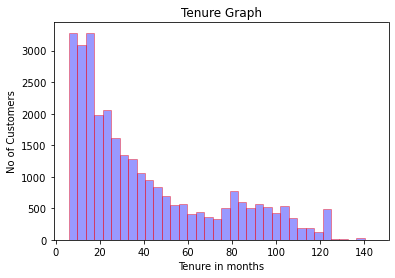

In [66]:
ax = sns.distplot(high_value_customers['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')

In [67]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
high_value_customers['tenure_range'] = pd.cut(high_value_customers['aon_mon'], tenure_range, labels=tenure_label)
high_value_customers['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

### Inference : 
-  There are many cusotmers less than a year than more than customers 40 month  with service providers
 - These longevity of the cusotmer with service provider is not consider for high valued cusotmer.

## correlation of churn with other columns

<AxesSubplot:>

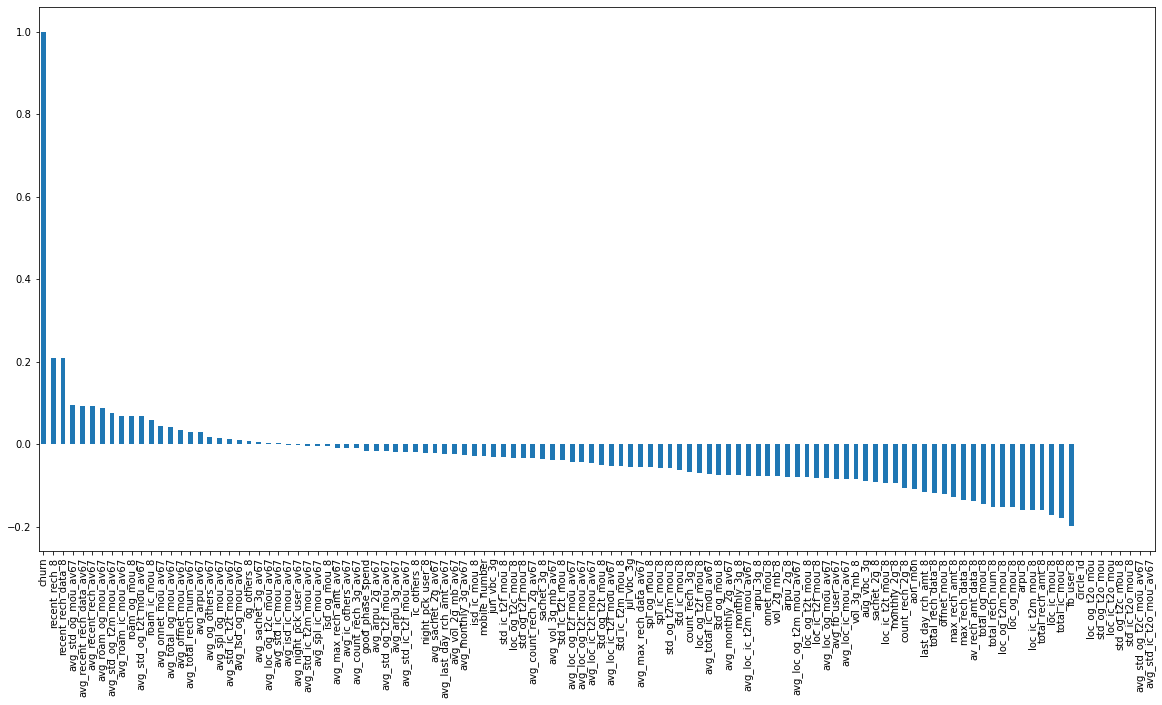

In [68]:
#  correlation of churn with other columns
plt.figure(figsize=(20,10))
high_value_customers.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

### Inference : 
-  Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
-  Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

### Relation between Total recharge vs avg revenue for the 8th month

<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

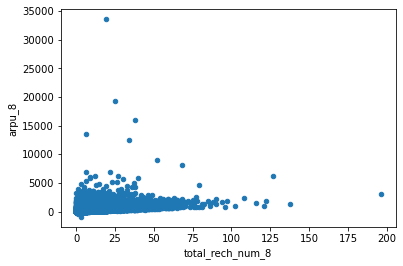

In [69]:
high_value_customers[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

### Inference:

 -  Relation between Total recharge vs avg revenue for the 8th month  is  not provoding much insight

### Relation between  tenure/AON monthly  vs revenue (avg arpu)

<AxesSubplot:xlabel='aon_mon', ylabel='avg_arpu_av67'>

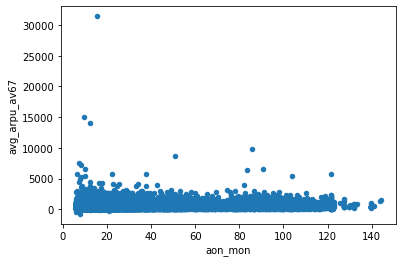

In [70]:
# plot between tenure vs revenue
high_value_customers[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

### Inference:

 -  Relation between  tenure/AON monthly  vs revenue (avg arpu) is direclty proportional Aon_mon vs Avg arpu for 6 and 7th month     is very consistent

### Relation between  tenure/AON monthly  vs Churn

<AxesSubplot:xlabel='churn', ylabel='aon_mon'>

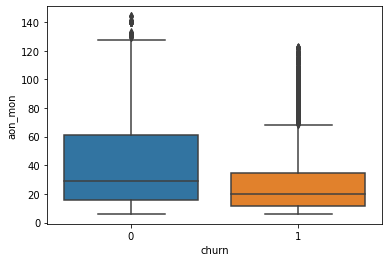

In [71]:
sns.boxplot(x = high_value_customers.churn, y = high_value_customers.aon_mon)

### Inference:

-  the cusomter who has attributing to long  AON  tend to less chance of churn  than those who has less AON with service provider.

### Relation between Churn Vs Average recharge amount  (6th & 7th month)  (volume Base cost )

Text(0.5, 1.0, 'Churn Vs Base Cost')

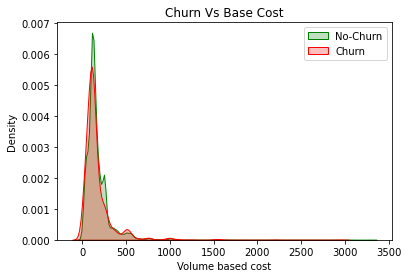

In [72]:
ax = sns.kdeplot(high_value_customers.avg_max_rech_amt_av67[(high_value_customers["churn"] == 0)],
                color="Green", shade = True)
ax = sns.kdeplot(high_value_customers.avg_max_rech_amt_av67[(high_value_customers["churn"] == 1)],
                ax =ax, color="Red", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

 ### Relation between Churn Vs Max  recharge amount  in 8th month (volume Base cost )

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

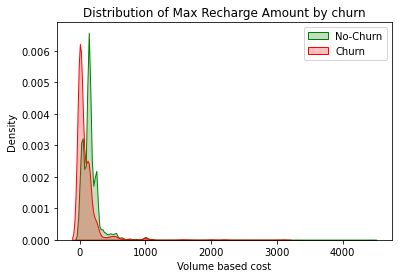

In [73]:
ax = sns.kdeplot(high_value_customers.max_rech_amt_8[(high_value_customers["churn"] == 0)],
                color="Green", shade = True)
ax = sns.kdeplot(high_value_customers.max_rech_amt_8[(high_value_customers["churn"] == 1)],
                ax =ax, color="Red", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

### Inference:

-  The high volume of people who has recharged , density of  the Avergare recharge indicate less likely to churn
- In continum to  Maximum rechanrge amount in 8th month and density clearly indicates the people are very least liekly to churn , hence we in other way less volument based cost customer high rate of churning based on the 6th 7th, 8th month data
- Local Incoming for 8th month, Arpu for 8th month and Max Recharge Amount for 8th month  are the positve impact on the retaining a reccuring customer.

## 4.0  Modelling

In [74]:
# we will create a new dataset for model_df building
model_df = high_value_customers[:].copy()

In [75]:
nullcolums = []

# are null column more than 0 nul val exist 
for i in model_df.isnull().sum().index:
    if model_df.isnull().sum()[i] > 0:
        nullcolums.append(i)
   
 
print(len(nullcolums))
print(nullcolums)

1
['tenure_range']


###  4.1  tenure is not adding value -  correlated with AON month

In [76]:
model_df.drop('tenure_range', axis=1, inplace=True)
model_df.drop('mobile_number', axis=1, inplace=True)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 113 entries, circle_id to aon_mon
dtypes: float64(103), int64(10)
memory usage: 26.1 MB


### 4.2 Creating  X & y dataset for model_df building, 

 -  X will obviously  independent features
 -  y will only have "churn"

In [77]:
X = model_df.drop(['churn'], axis=1)
y = model_df['churn']

model_df.drop('churn', axis=1, inplace=True)

model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 112 entries, circle_id to aon_mon
dtypes: float64(103), int64(9)
memory usage: 25.8 MB


## 4.3  Scalling the data 
- used here standard scaler

In [78]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### We have to deal with class imbalance at the time of train-test split. We have to use the stratify parameter

In [79]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1, stratify=y)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20967, 112)
Dimension of X_test: (8986, 112)


## 4.4  Now that we have the correct split, we need to increase the number of churns so that our models learn better. Lets use Synthetic Minority Oversampling Technique SMOTE over here

In [81]:
pip install imblearn

     |████████████████████████████████| 189 kB 5.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [82]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [85]:
#  given dataset is skewed, balance dataset
sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [86]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

Dimension of X_tr Shape: (38528, 112)
Dimension of y_tr Shape: (38528,)
Imbalance in Training dataset: 1.0


# 5.0 PCA

In [87]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# apply PCA on train data
pca.fit(X_tr)

PCA(random_state=42)

In [88]:
pca.components_

array([[ 2.60309419e-19, -1.66533454e-16,  2.22044605e-16, ...,
        -2.23560999e-01, -2.23560999e-01,  3.18128547e-02],
       [-1.58757040e-19, -8.32667268e-17,  8.32667268e-17, ...,
         6.06265400e-02,  6.06265400e-02,  6.68437822e-02],
       [ 5.36550022e-20, -2.08166817e-17,  3.81639165e-17, ...,
         5.87428756e-02,  5.87428756e-02, -7.14413591e-02],
       ...,
       [-0.00000000e+00, -3.41524130e-06,  2.59043742e-06, ...,
         2.21340755e-07, -2.21340755e-07, -4.22330628e-18],
       [ 9.99999278e-01, -6.31638565e-04,  8.19571693e-04, ...,
        -1.57319454e-05,  1.57319454e-05, -3.90312782e-18],
       [ 0.00000000e+00,  1.35093908e-01, -7.99413871e-02, ...,
        -7.24186168e-02,  7.24186168e-02,  6.93889390e-17]])

In [89]:
pca.explained_variance_ratio_

array([1.34251942e-01, 1.01401659e-01, 6.24167319e-02, 6.14242881e-02,
       4.79764441e-02, 3.57411373e-02, 3.46790467e-02, 3.35988356e-02,
       3.11903853e-02, 2.47083487e-02, 2.20310813e-02, 2.07270410e-02,
       1.99265430e-02, 1.79613057e-02, 1.78040098e-02, 1.56370059e-02,
       1.47395228e-02, 1.42431043e-02, 1.26733057e-02, 1.22171494e-02,
       1.21715437e-02, 1.17617037e-02, 1.16151598e-02, 1.14572303e-02,
       1.09476926e-02, 1.02947913e-02, 9.94096595e-03, 9.52361814e-03,
       8.67830271e-03, 8.47242117e-03, 7.90923975e-03, 7.77613876e-03,
       7.55614086e-03, 7.16699074e-03, 7.09240760e-03, 6.91956447e-03,
       6.58358238e-03, 6.46601382e-03, 5.90787083e-03, 5.86025600e-03,
       5.60399310e-03, 5.54233857e-03, 5.05717585e-03, 4.54969719e-03,
       3.95343942e-03, 3.70929022e-03, 3.63863622e-03, 3.58502967e-03,
       3.31398263e-03, 3.14669475e-03, 2.98421743e-03, 2.84679313e-03,
       2.73885108e-03, 2.69118654e-03, 2.55595777e-03, 2.42558850e-03,
      

<BarContainer object of 112 artists>

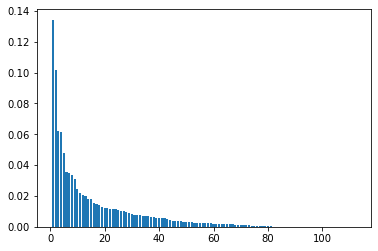

In [90]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [91]:
pca_cumsum =  np.cumsum(pca.explained_variance_ratio_) 

In [92]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38528, 112)
(8986, 112)


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_model_df = pd.DataFrame(y_pred)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model_df with PCA: ",accuracy_score(y_test,y_pred))

[[6758 1498]
 [ 133  597]]
Accuracy of the logistic regression model_df with PCA:  0.8184954373469842


## 5.1 Assuming 3 prinicple components 

In [95]:
col = list(model_df.columns)
model_df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
model_df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,2.603094e-19,-1.587570e-19,5.365500e-20,circle_id
1,-1.665335e-16,-8.326673e-17,-2.081668e-17,loc_og_t2o_mou
2,2.220446e-16,8.326673e-17,3.816392e-17,std_og_t2o_mou
3,-0.000000e+00,-1.665335e-16,-6.938894e-17,loc_ic_t2o_mou
4,3.096692e-02,2.551449e-01,6.407687e-02,arpu_8
5,-6.351790e-02,1.503383e-01,5.505487e-02,onnet_mou_8
6,-4.335522e-02,1.930741e-01,-1.107538e-02,offnet_mou_8
7,-2.016580e-02,3.933625e-02,1.431200e-01,roam_ic_mou_8
8,-3.369520e-02,6.776654e-02,1.935789e-01,roam_og_mou_8
9,7.716765e-03,9.867228e-02,-8.435730e-02,loc_og_t2t_mou_8


## 5.2 Initial  scree plot 

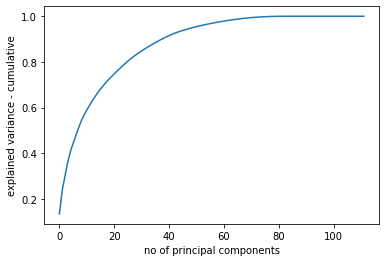

In [96]:
#plt.plot(range(1,len(pca_cumsum)+1), pca_cumsum)

# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (6,4))
plt.plot(pca_cumsum)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [97]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([ 13.4,  23.5,  29.7,  35.8,  40.6,  44.2,  47.7,  51.1,  54.2,
        56.7,  58.9,  61. ,  63. ,  64.8,  66.6,  68.2,  69.7,  71.1,
        72.4,  73.6,  74.8,  76. ,  77.2,  78.3,  79.4,  80.4,  81.4,
        82.4,  83.3,  84.1,  84.9,  85.7,  86.5,  87.2,  87.9,  88.6,
        89.3,  89.9,  90.5,  91.1,  91.7,  92.3,  92.8,  93.3,  93.7,
        94.1,  94.5,  94.9,  95.2,  95.5,  95.8,  96.1,  96.4,  96.7,
        97. ,  97.2,  97.4,  97.6,  97.8,  98. ,  98.2,  98.4,  98.6,
        98.8,  99. ,  99.2,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. , 100.1, 100.2, 100.3, 100.4, 100.4, 100.4, 100.4, 100.4,
       100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4,
       100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4,
       100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4, 100.4,
       100.4, 100.4, 100.4, 100.4])

### Inference: 
 -  **40 columns explains ~90% of the variance**

## 5.3 PCA with reduced features

In [99]:
# apply PCA with  components
reduced_dim =40
pca_reduced_vars = PCA(n_components=reduced_dim)

df_pca_reduced_vars = pca_reduced_vars.fit_transform(X_tr)
print(df_pca_reduced_vars.shape)

model_df_test_pca_reduced_vars = pca_reduced_vars.transform(X_test)
print(model_df_test_pca_reduced_vars.shape)

(38528, 40)
(8986, 40)


In [100]:
# Let's run the model_df using the selected variables
from sklearn.linear_model import LogisticRegression
regularised_var =  1e9
lr_pca1 = LogisticRegression(C = regularised_var)
lr_pca1.fit(df_pca_reduced_vars, y_tr)

# Predicted probabilities
y_pred_reduced_dim = lr_pca1.predict(model_df_test_pca_reduced_vars)

# Converting y_pred to a dataframe which is an array
model_df_y_pred = pd.DataFrame(y_pred_reduced_dim)

print("Accuracy with",reduced_dim,"PCAs: ",accuracy_score(y_test,y_pred_reduced_dim))

Accuracy with 40 PCAs:  0.8102604050745604


In [101]:
print(confusion_matrix(y_test,y_pred_reduced_dim))

[[6680 1576]
 [ 129  601]]


<BarContainer object of 40 artists>

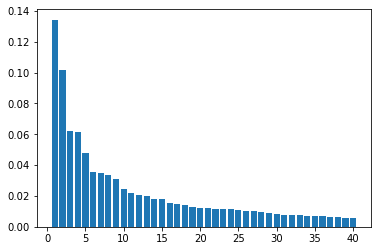

In [102]:
plt.bar(range(1,len(pca_reduced_vars.explained_variance_ratio_)+1), pca_reduced_vars.explained_variance_ratio_)

In [103]:
pca_reduced_cumsum =  np.cumsum(pca_reduced_vars.explained_variance_ratio_) 

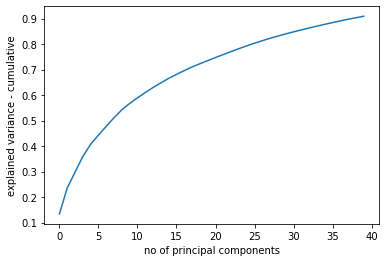

In [104]:
fig = plt.figure(figsize = (6,4))
plt.plot(pca_reduced_cumsum)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [105]:
col = list(model_df.columns)
model_df_reduced = pd.DataFrame({'PC-1':pca_reduced_vars.components_[0],'PC-2':pca_reduced_vars.components_[1], 'PC-3':pca_reduced_vars.components_[2],'Feature':col})
model_df_reduced.head(10)

,PC-1,PC-2,PC-3,Feature
0,-1.110223e-16,-1.110223e-16,2.081668e-17,circle_id
1,-0.000000e+00,-1.110223e-16,-6.938894e-17,loc_og_t2o_mou
2,-1.387779e-17,-2.775558e-17,4.996004e-16,std_og_t2o_mou
3,-0.000000e+00,-0.000000e+00,-1.942890e-16,loc_ic_t2o_mou
4,3.096692e-02,2.551449e-01,6.407687e-02,arpu_8
5,-6.351790e-02,1.503383e-01,5.505488e-02,onnet_mou_8
6,-4.335522e-02,1.930741e-01,-1.107537e-02,offnet_mou_8
7,-2.016580e-02,3.933625e-02,1.431200e-01,roam_ic_mou_8
8,-3.369520e-02,6.776654e-02,1.935789e-01,roam_og_mou_8
9,7.716766e-03,9.867227e-02,-8.435724e-02,loc_og_t2t_mou_8


In [106]:
print(model_df_reduced['Feature'].head(15))

0            circle_id
1       loc_og_t2o_mou
2       std_og_t2o_mou
3       loc_ic_t2o_mou
4               arpu_8
5          onnet_mou_8
6         offnet_mou_8
7        roam_ic_mou_8
8        roam_og_mou_8
9     loc_og_t2t_mou_8
10    loc_og_t2m_mou_8
11    loc_og_t2f_mou_8
12    loc_og_t2c_mou_8
13        loc_og_mou_8
14    std_og_t2t_mou_8
Name: Feature, dtype: object


### Inference:



 - model_df has 81% Accuracy
-  40 features can explain 90% variance in the dataset
 - Again most **imp features**: 
 
-            circle_id
-       loc_og_t2o_mou
-       std_og_t2o_mou
-       loc_ic_t2o_mou
-               arpu_8
-          onnet_mou_8
-         offnet_mou_8
-        roam_ic_mou_8
-        roam_og_mou_8
-     loc_og_t2t_mou_8

## 6. logstic Regression

In [107]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

#  RFE select 11 most imp features for us
rfe = RFE(lr, 11)   
rfe = rfe.fit(X_tr, y_tr)

In [108]:
rfe_features = list(model_df.columns[rfe.support_])
print("11 most important features selected by RFE ", rfe_features)

11 most important features selected by RFE  ['onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'avg_arpu_av67', 'avg_total_ic_mou_av67']


In [109]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [110]:
# lets create a Logisctic Regression model_df on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [111]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[6740 1516]
 [ 140  590]]
Accuracy on the test dataset: 0.8157133318495438


In [112]:
# lets check classification report on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8256
           1       0.28      0.81      0.42       730

    accuracy                           0.82      8986
   macro avg       0.63      0.81      0.65      8986
weighted avg       0.92      0.82      0.85      8986



## Inference :

- model_df Accuracy is approx 82%
- Confusion matix shows high false positive rate, which is not good,

## 7.0 SVM

In [113]:
# feature selection using lasso remove
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model_df = SelectFromModel(svc, prefit=True)
X_lasso = svc_model_df.transform(X_tr)
position = svc_model_df.get_support(indices=True)

print(" X Lasso  Shape:", X_lasso.shape)
print("Position of Features:", position)

 X Lasso  Shape: (38528, 36)
Position of Features: [  6   8  10  13  16  20  22  24  26  32  33  36  37  39  40  42  44  45
  50  54  55  58  59  61  62  64  65  75  89  93  94 104 105 107 108 111]


In [114]:
# feature vector for decision tree  Remove
lasso_features = list(model_df.columns[position])
print("Lasso Features:", lasso_features)

Lasso Features: ['offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'count_rech_2g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'fb_user_8', 'aug_vbc_3g', 'recent_rech_8', 'recent_rech_data_8', 'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'avg_total_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_monthly_2g_av67', 'avg_sachet_2g_av67', 'avg_sachet_3g_av67', 'avg_fb_user_av67', 'aon_mon']


### Inference:


- Again most **imp features**: 
    'offnet_mou_8'
    'roam_og_mou_8'
    'loc_og_t2m_mou_8'
    'loc_og_mou_8'
    'std_og_t2f_mou_8'
    'spl_og_mou_8'
    'total_og_mou_8'
    'loc_ic_t2m_mou_8'
    'loc_ic_mou_8'
    'total_ic_mou_8'

## 8.0 Decision tree

In [115]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model_df predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = decision_tree.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8256
           1       0.35      0.79      0.48       730

    accuracy                           0.86      8986
   macro avg       0.66      0.83      0.70      8986
weighted avg       0.93      0.86      0.89      8986



In [117]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[7173 1083]
 [ 151  579]]
Decision Tree - Accuracy : 0.8626752726463387


### Inference:

 - The accuracy without tuning tend to be 0.86

## 8.1 Hyperparameters fine tuning

In [119]:
%%time
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model_df on
parameters = {'max_depth': range(1, 40)}

# instantiate the model_df
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

CPU times: user 3min 2s, sys: 1.12 s, total: 3min 3s
Wall time: 3min 8s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [120]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.136188,0.042166,0.002780,0.001409,1,{'max_depth': 1},0.780561,0.792499,0.784454,0.787670,...,0.786493,0.003935,39,0.792453,0.789988,0.787717,0.791519,0.789508,0.790237,0.001643
1,0.182097,0.046187,0.001634,0.000088,2,{'max_depth': 2},0.807812,0.813652,0.821697,0.815964,...,0.817328,0.006764,38,0.821329,0.816268,0.822562,0.818317,0.815170,0.818729,0.002840
2,0.222733,0.013845,0.001653,0.000127,3,{'max_depth': 3},0.828575,0.845705,0.850506,0.845295,...,0.843880,0.007913,37,0.848420,0.845176,0.848031,0.846251,0.847452,0.847066,0.001196
3,0.279610,0.008015,0.001625,0.000302,4,{'max_depth': 4},0.853880,0.869582,0.871010,0.867229,...,0.866046,0.006208,36,0.873759,0.870871,0.867465,0.868702,0.865944,0.869348,0.002732
4,0.343132,0.013150,0.001545,0.000064,5,{'max_depth': 5},0.859071,0.875811,0.878406,0.876963,...,0.874585,0.008098,35,0.883817,0.878399,0.877815,0.877981,0.878889,0.879380,0.002249


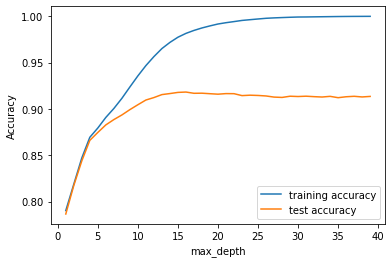

In [121]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# max_depth =10 seems to be the optimal one

In [122]:
%%time
# lets find optimal value of minimum sample leaf

from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model_df on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model_df
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

CPU times: user 46 s, sys: 591 ms, total: 46.6 s
Wall time: 52.6 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [123]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.167100,0.093075,0.003498,0.000551,5,{'min_samples_leaf': 5},0.877887,0.908253,0.913833,0.921220,...,0.908275,0.015897,1,0.970833,0.965447,0.965479,0.964929,0.965156,0.966369,0.002241
1,1.008182,0.046607,0.004122,0.000993,25,{'min_samples_leaf': 25},0.876071,0.903582,0.902154,0.897339,...,0.895842,0.010107,2,0.926838,0.921647,0.920349,0.919313,0.919605,0.921551,0.002764
2,0.925692,0.060331,0.004129,0.000327,45,{'min_samples_leaf': 45},0.871399,0.892811,0.895406,0.895263,...,0.890262,0.009506,3,0.911297,0.908896,0.904451,0.907407,0.907537,0.907918,0.002227
3,0.867902,0.039580,0.004172,0.001754,65,{'min_samples_leaf': 65},0.872697,0.893070,0.896574,0.889293,...,0.889353,0.008681,4,0.904322,0.900201,0.900590,0.898809,0.897771,0.900339,0.002231
4,1.041508,0.049355,0.004238,0.001328,85,{'min_samples_leaf': 85},0.870620,0.891513,0.893460,0.887476,...,0.886914,0.008376,5,0.901694,0.896859,0.895627,0.894884,0.892094,0.896231,0.003148


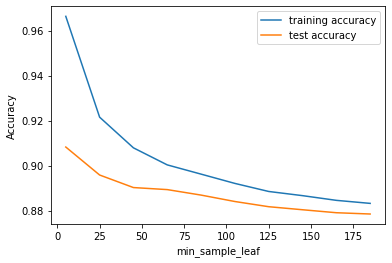

In [124]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_sample_leaf =25  optimal values

In [125]:
%%time

from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model_df on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model_df
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

CPU times: user 1min 5s, sys: 489 ms, total: 1min 6s
Wall time: 1min 9s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [126]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.893718,0.206394,0.004339,0.000781,5,{'min_samples_split': 5},0.874903,0.918116,0.920581,0.921609,...,0.910819,0.018000,1,0.994874,0.993122,0.993479,0.993836,0.993738,0.993810,0.000587
1,1.621992,0.337545,0.005085,0.001369,25,{'min_samples_split': 25},0.874254,0.914872,0.909421,0.912784,...,0.904434,0.015201,2,0.968205,0.960677,0.960158,0.961100,0.959057,0.961839,0.003255
2,1.375695,0.046583,0.003228,0.000580,45,{'min_samples_split': 45},0.866208,0.910330,0.902154,0.905646,...,0.898282,0.016250,3,0.949873,0.947635,0.944066,0.944652,0.942316,0.945708,0.002698
3,1.326724,0.056461,0.003185,0.000579,65,{'min_samples_split': 65},0.866597,0.906307,0.903582,0.903958,...,0.896699,0.015092,4,0.940562,0.938940,0.935403,0.935568,0.934432,0.936981,0.002351
4,1.321281,0.067014,0.003263,0.000453,85,{'min_samples_split': 85},0.865040,0.899169,0.903322,0.900324,...,0.894181,0.014656,5,0.932808,0.929823,0.929790,0.928560,0.928787,0.929954,0.001516


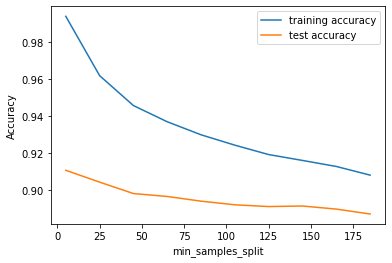

In [127]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_samples_leaf=50  optimal values

In [128]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model_df
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [129]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
#  optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8948039342663116


In [130]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [131]:
%%time
# model_df with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

CPU times: user 491 ms, sys: 5.31 ms, total: 496 ms
Wall time: 508 ms


DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [132]:
# accuracy score
print ('Accuracy Score for Decision Tree Final model_df :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final model_df : 0.8633429779657245


### Inferences :

-  86% accuracy on the test dataset
- lots of false positives in the confusion matrix

## 9. Random Forest

In [134]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_df_rf = RandomForestClassifier()
model_df_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_df_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9248831515691075
CPU times: user 16.1 s, sys: 168 ms, total: 16.3 s
Wall time: 17.2 s


In [135]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8256
           1       0.53      0.68      0.59       730

    accuracy                           0.92      8986
   macro avg       0.75      0.81      0.78      8986
weighted avg       0.93      0.92      0.93      8986



In [138]:
# Printing confusion matrix

print(confusion_matrix(y_test, prediction_test))

[[7817  439]
 [ 236  494]]


In [139]:
%%time
# GridSearchCV to find optimal n_estimators

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model_df on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model_df
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

CPU times: user 2min 38s, sys: 1.06 s, total: 2min 39s
Wall time: 2min 41s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [140]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.564429,0.254951,0.079175,0.027084,2,{'max_depth': 2},0.816636,0.819232,0.817026,0.819857,...,0.817743,0.001523,4,0.822951,0.816916,0.820583,0.820653,0.816663,0.819553,0.002413
1,5.762927,0.098490,0.084252,0.016578,7,{'max_depth': 7},0.888788,0.906826,0.906566,0.904218,...,0.903317,0.007510,3,0.915450,0.911297,0.909350,0.912468,0.909483,0.911610,0.002245
2,9.083110,0.254623,0.110821,0.006029,12,{'max_depth': 12},0.925513,0.943421,0.946795,0.943154,...,0.941082,0.007931,2,0.971579,0.969145,0.968432,0.968498,0.968757,0.969282,0.001175
3,10.405583,0.386382,0.133725,0.010704,17,{'max_depth': 17},0.941993,0.955619,0.957566,0.956132,...,0.954371,0.006422,1,0.989326,0.989553,0.989910,0.989067,0.989780,0.989527,0.000305


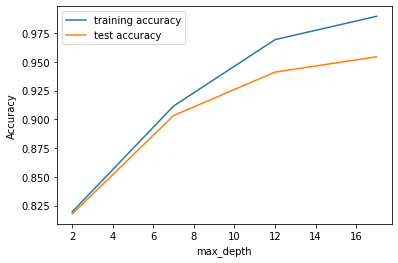

In [141]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [142]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_df_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model_df on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model_df (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

CPU times: user 9min 44s, sys: 2.65 s, total: 9min 47s
Wall time: 9min 53s


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

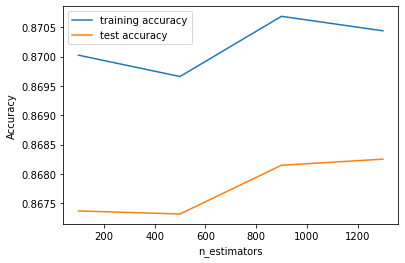

In [143]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [144]:
%%time
# GridSearchCV to find optimal min_samples_leaf

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model_df on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model_df
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

CPU times: user 17min 20s, sys: 3.94 s, total: 17min 24s
Wall time: 17min 31s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

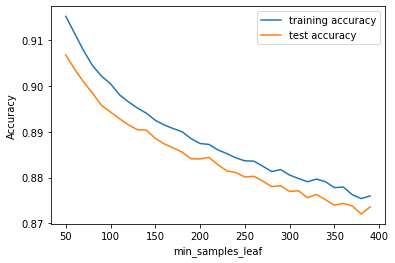

In [145]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [146]:
%%time
# GridSearchCV to find optimal min_samples_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model_df on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model_df
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_lasso, y_tr)

CPU times: user 11min 45s, sys: 2.08 s, total: 11min 47s
Wall time: 11min 50s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

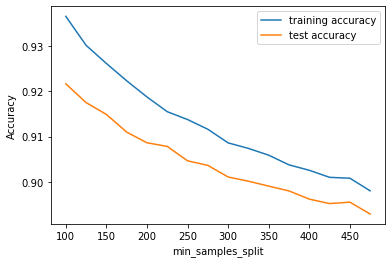

In [147]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [148]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model_df
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

CPU times: user 411 µs, sys: 1.68 ms, total: 2.09 ms
Wall time: 2.53 ms


In [149]:
%%time
# fit the grid search with the data
grid_search.fit(X_lasso, y_tr)
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy is 0.8951413609253867 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 500}
CPU times: user 1min 56s, sys: 697 ms, total: 1min 56s
Wall time: 2h 55min 31s


In [150]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_df_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_df_rf.fit(X_train, y_train)

# predictions
prediction_test = model_df_rf.predict(X_test)

CPU times: user 2min 8s, sys: 731 ms, total: 2min 9s
Wall time: 38.3 s


In [151]:
#  metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5515
           1       0.72      0.48      0.58       476

    accuracy                           0.94      5991
   macro avg       0.84      0.73      0.77      5991
weighted avg       0.94      0.94      0.94      5991

[[5426   89]
 [ 246  230]]


In [152]:
# score
print ('Accuracy Score for Random Forest Final model_df :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final model_df : 0.9440827908529461


<AxesSubplot:>

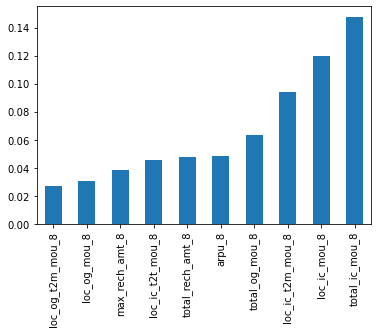

In [153]:
# list of important features
X = model_df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_df_rf.feature_importances_
imp_features = pd.Series(importances,
                 index=X.columns.values)
imp_features.sort_values()[-10:].plot(kind = 'bar')

### Inference with Models

- Using RFE reduced the variable and tried PCA 
-  Created first model with logistic regression. Using a logistic regression model as a baseline (benchmark) model.It gave  an idea about the important variables.
- Used decision trees and compared their performance with the logistic regression model. 
- Random forest showed significant improvement in performance, 
- SVM tend to be slowest ( couldnt optimise much)
- Random Forest produced the best prediction results followed by SVM

# Overall Inferecne

Following are important features to consider for modelling to check on possiblity of Churn

-  **Std Outgoing Calls** 
-  **Revenue Per Customer** 
-  **Local Incoming call**
-  **Outgoing Calls for 8th Month** 
-  **avg revenue in 8th Month**.
-  **cutomers with tenure less than 40 months are more likely to churn**.
-  **Max Recharge Amount**

## References:

[1] : np.where : https://www.geeksforgeeks.org/numpy-where-in-python/

[2] plotting in 2D & 3D  https://www.southampton.ac.uk/~feeg1001/notebooks/Matplotlib.html

[3] SMOTE & Six: https://stackoverflow.com/questions/61867945/python-import-error-cannot-import-name-six-from-sklearn-externals

[4] https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

[5] mlrose · PyPI
[6] https://imbalanced-learn.org/stable/install.html

[7] https://stackoverflow.com/questions/60145652/no-module-named-sklearn-neighbors-base

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18![image.png](attachment:image.png)

[8] https://machinelearningmastery.com/rfe-feature-selection-in-python/

[9]https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/

[10] https://www.geeksforgeeks.org/anscombes-quartet/

[11] https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

[12] Drop Outliers :   Python code snippet 
	 https://www.analyticsvidhya.com/blog/2021/03/zooming-out-a-look-at-outlier-and-how-to-deal-with-them-indata-science/
     
[13] RFE with VIF  automated path:   https://machinelearningmastery.com/rfe-feature-selection-in-python/![image.png]
(attachment:image.png)